## Be Heart Smart EDA on cleaned data connected to Db

In [1]:
# Import the neccessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
# Import Username,Password and Database_name
from config import Username,Password,DBname
print("All neccessary libraries imported")

All neccessary libraries imported


In [2]:
%matplotlib notebook

In [3]:
#!pip install psycopg2-binary

## Create Connection

In [4]:
# The create_engine() function produces an Engine object based on a URL
engine = create_engine('postgresql+psycopg2://postgres:'+ Password + '@localhost:5432/' + DBname)
connection = engine.connect()

### Create a dataframe from the table in database

In [5]:
# Create cardio dataframe from cardio data cleaned table in the database
cardio_df = pd.read_sql("SELECT * FROM cardio_cleaned",connection)
cardio_df.head()

,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoker,alcohol_intake,active,cardio
0,86650.0,51.0,1.0,171.0,29.0,110.0,70.0,2.0,1.0,0.0,0.0,1.0,1.0
1,26503.0,49.0,1.0,160.0,30.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0
2,59853.0,58.0,1.0,143.0,30.0,103.0,61.0,2.0,1.0,0.0,0.0,1.0,0.0
3,24167.0,47.0,2.0,170.0,31.0,150.0,90.0,2.0,2.0,0.0,0.0,1.0,1.0
4,31439.0,42.0,1.0,146.0,32.0,100.0,70.0,1.0,1.0,0.0,0.0,0.0,0.0


In [7]:
# list of column names
cardio_df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'systolic_bp',
       'diastolic_bp', 'cholesterol', 'glucose', 'smoker', 'alcohol_intake',
       'active', 'cardio'],
      dtype='object')

In [8]:
# Check the data type
cardio_df.dtypes

id                float64
age               float64
gender            float64
height            float64
weight            float64
systolic_bp       float64
diastolic_bp      float64
cholesterol       float64
glucose           float64
smoker            float64
alcohol_intake    float64
active            float64
cardio            float64
dtype: object

In [9]:
# Change the data type to astype()
cardio_df.astype(int).dtypes

id                int64
age               int64
gender            int64
height            int64
weight            int64
systolic_bp       int64
diastolic_bp      int64
cholesterol       int64
glucose           int64
smoker            int64
alcohol_intake    int64
active            int64
cardio            int64
dtype: object

In [10]:
# Checking for null values
cardio_df.count()

id                68297
age               68297
gender            68297
height            68297
weight            68297
systolic_bp       68297
diastolic_bp      68297
cholesterol       68297
glucose           68297
smoker            68297
alcohol_intake    68297
active            68297
cardio            68297
dtype: int64

In [11]:
cardio_df.shape

(68297, 13)

<IPython.core.display.Javascript object>


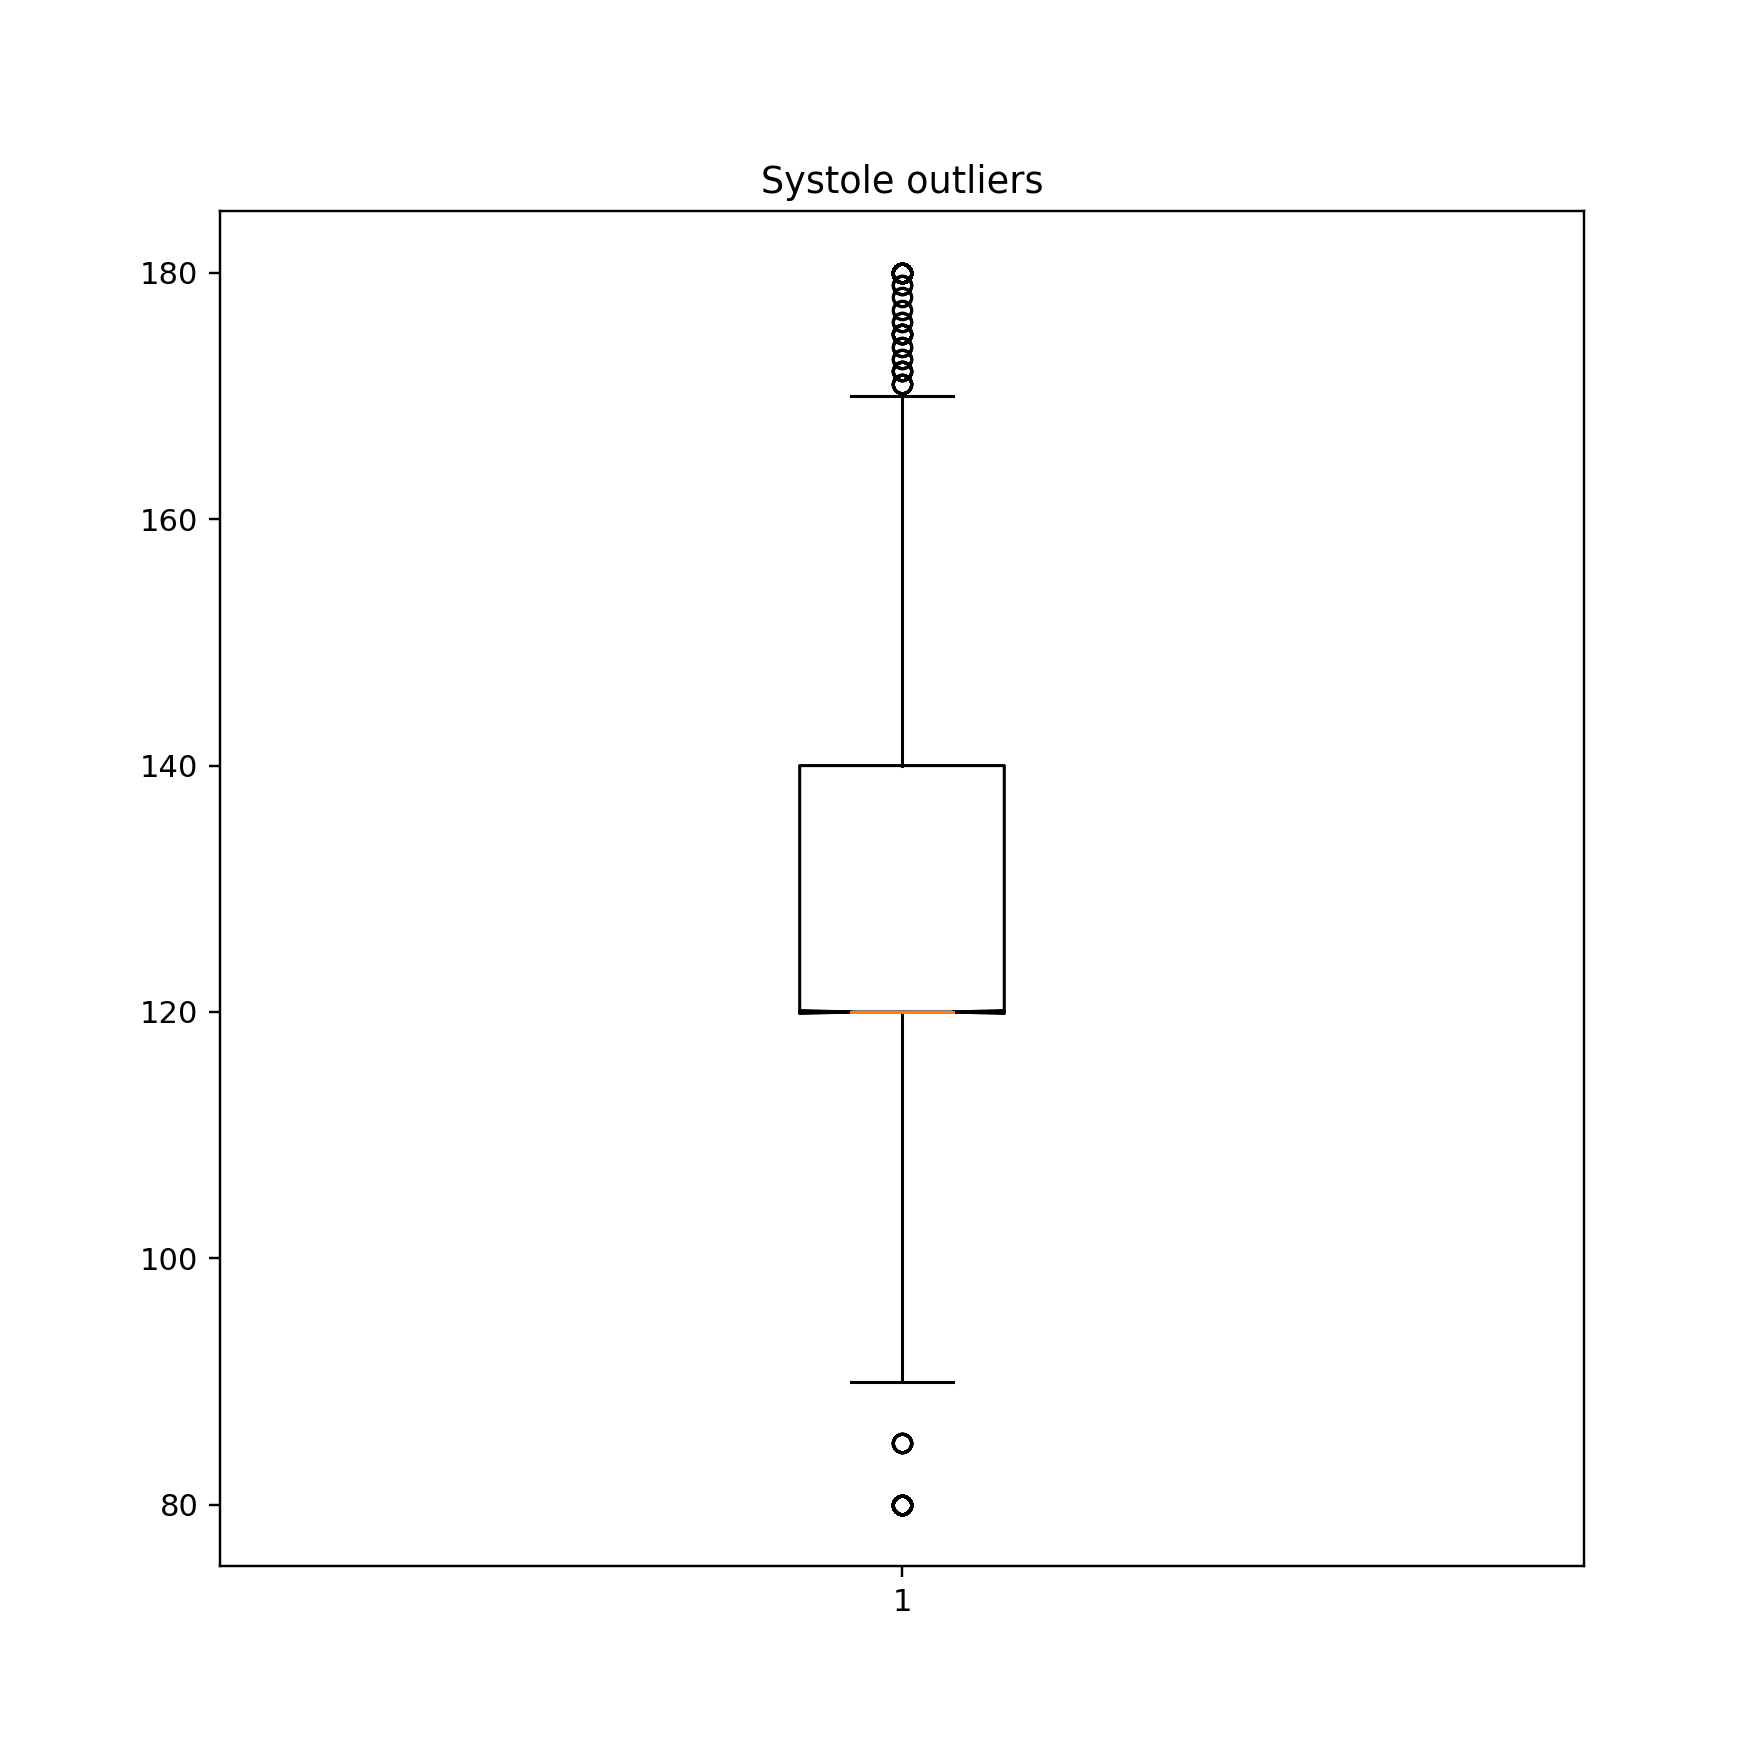

In [12]:
data = [cardio_df["systolic_bp"]]
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.set_title('Systole outliers')
ax1.boxplot(data, notch= True)
plt.show()

<IPython.core.display.Javascript object>


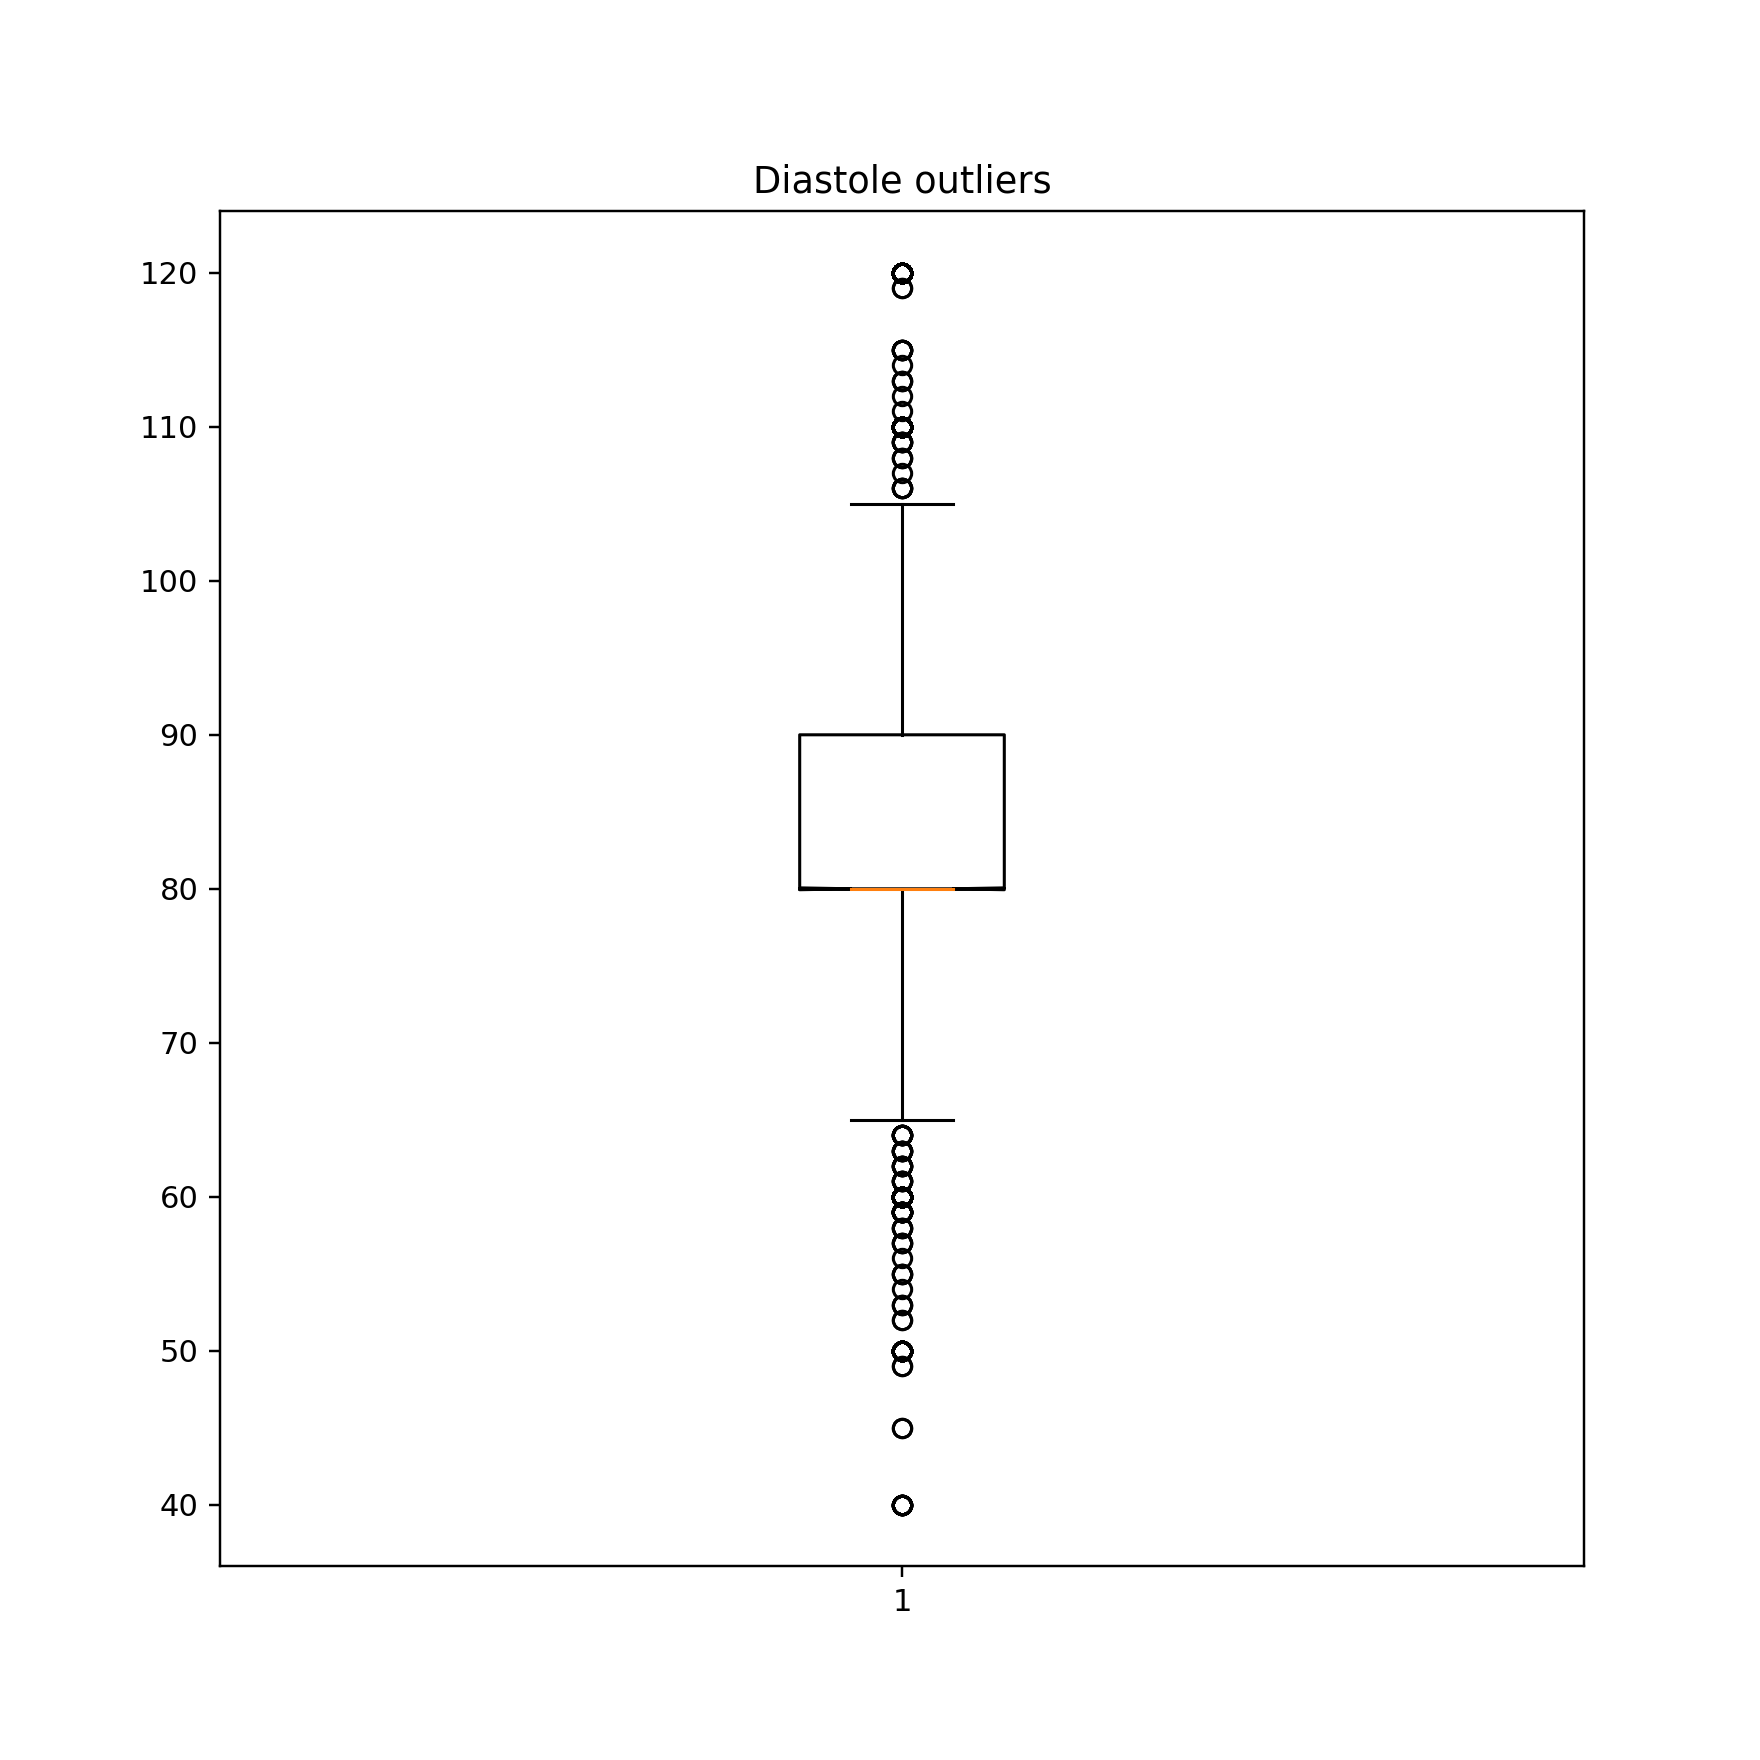

In [13]:
data = [cardio_df["diastolic_bp"]]
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.set_title('Diastole outliers')
ax1.boxplot(data, notch= True)
plt.show()

<IPython.core.display.Javascript object>


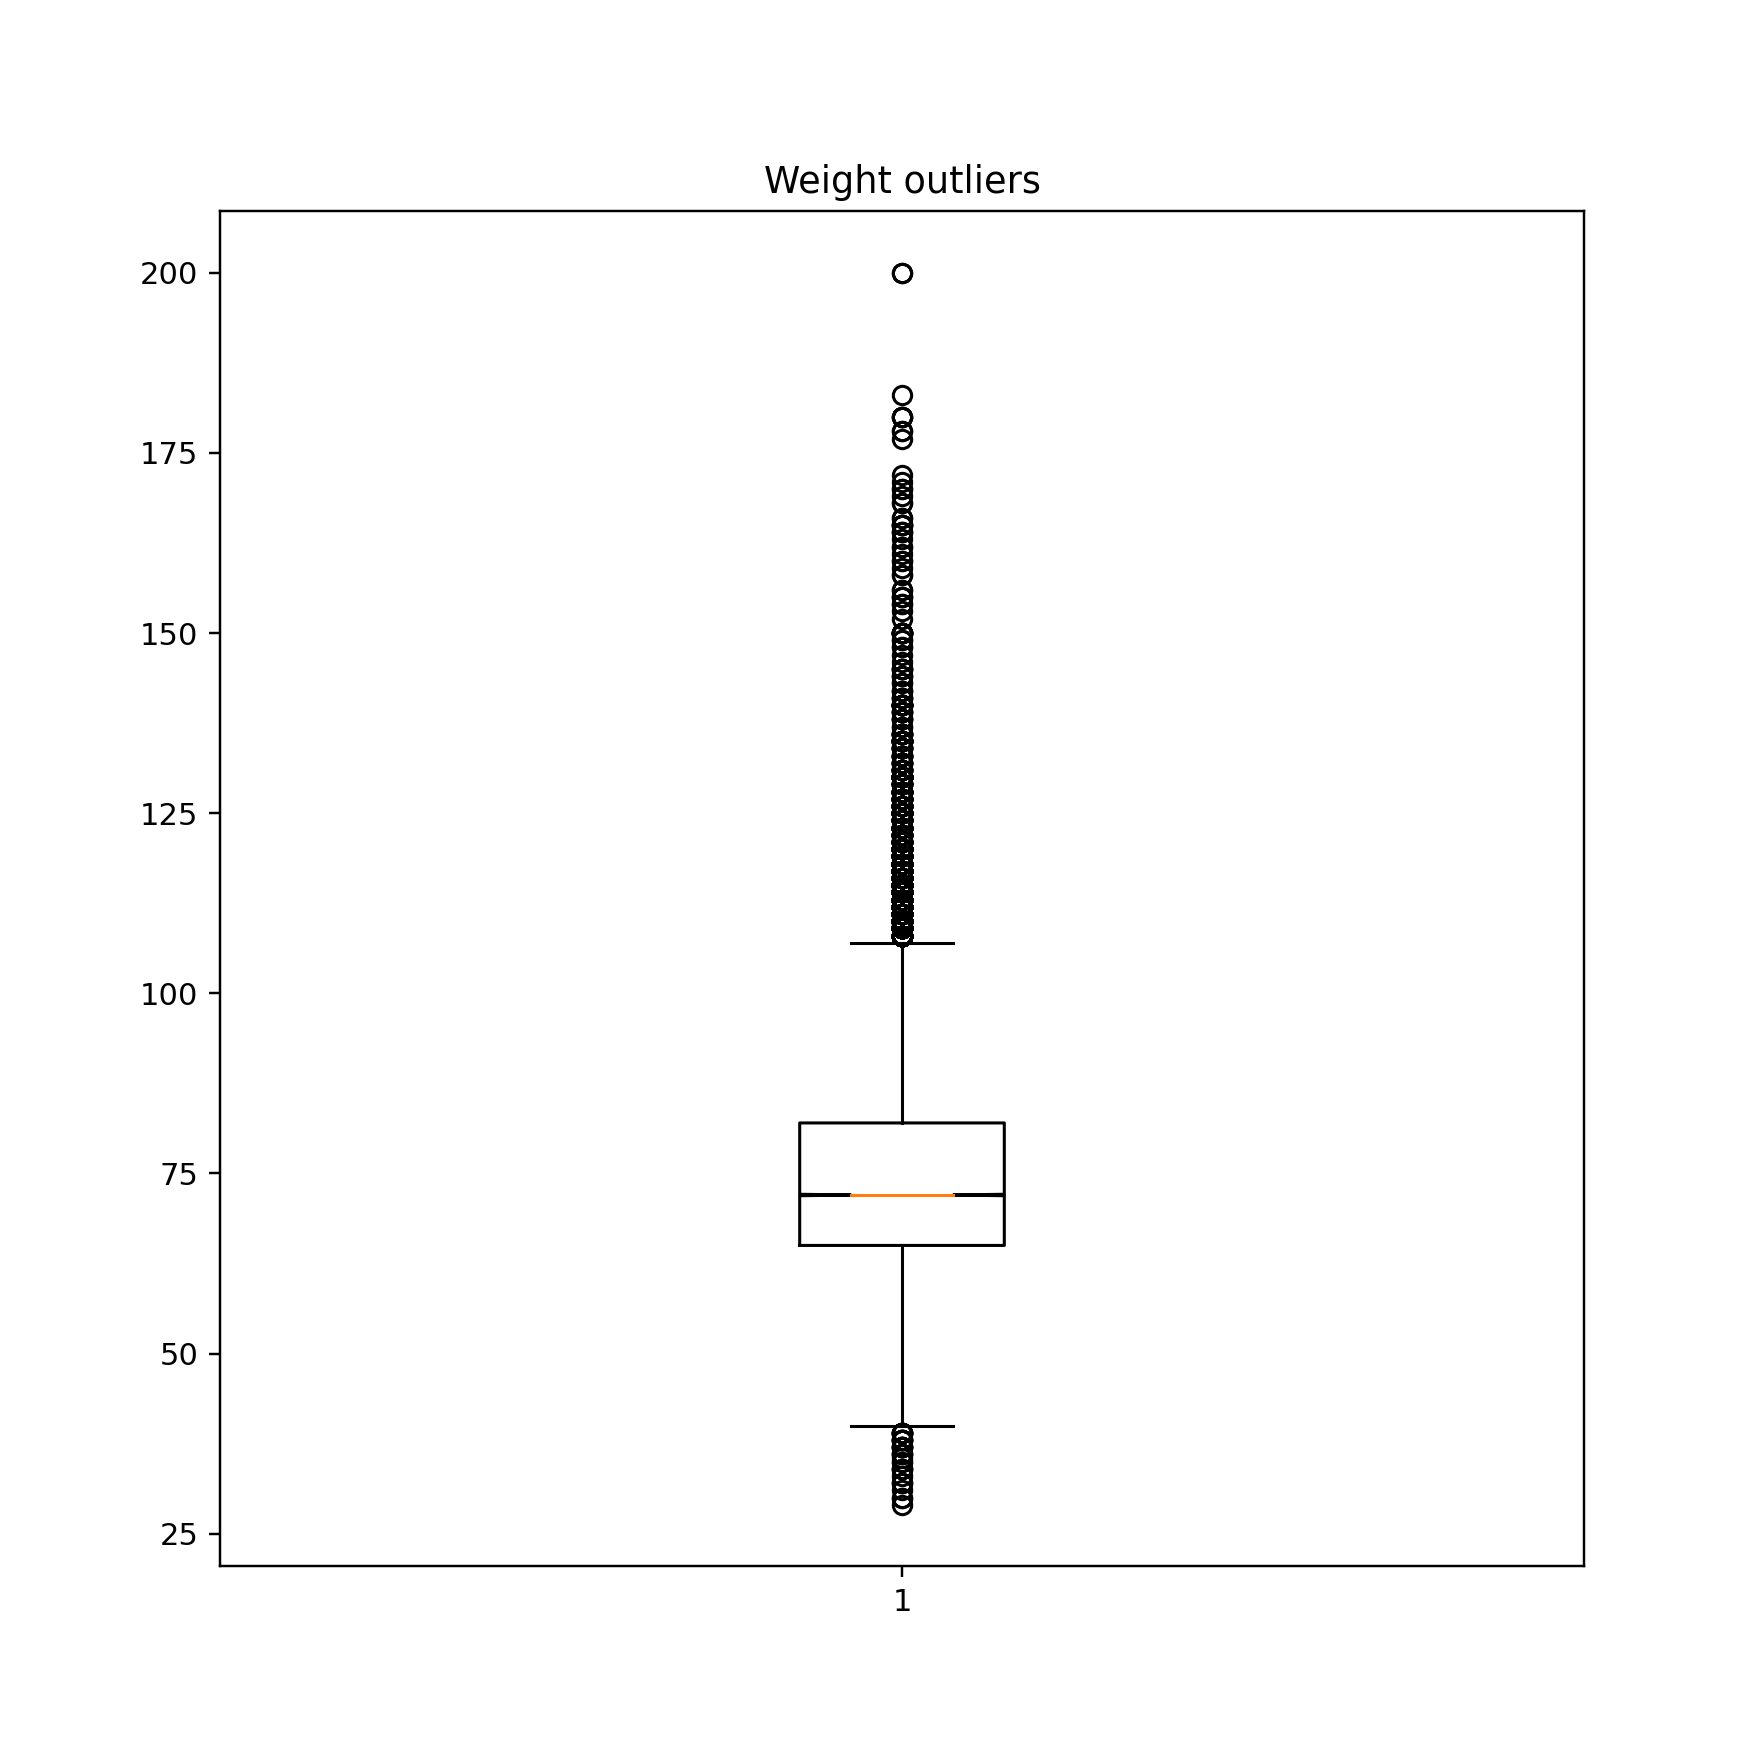

In [14]:
data = [cardio_df["weight"]]
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.set_title('Weight outliers')
ax1.boxplot(data, notch= True)
plt.show()

<IPython.core.display.Javascript object>


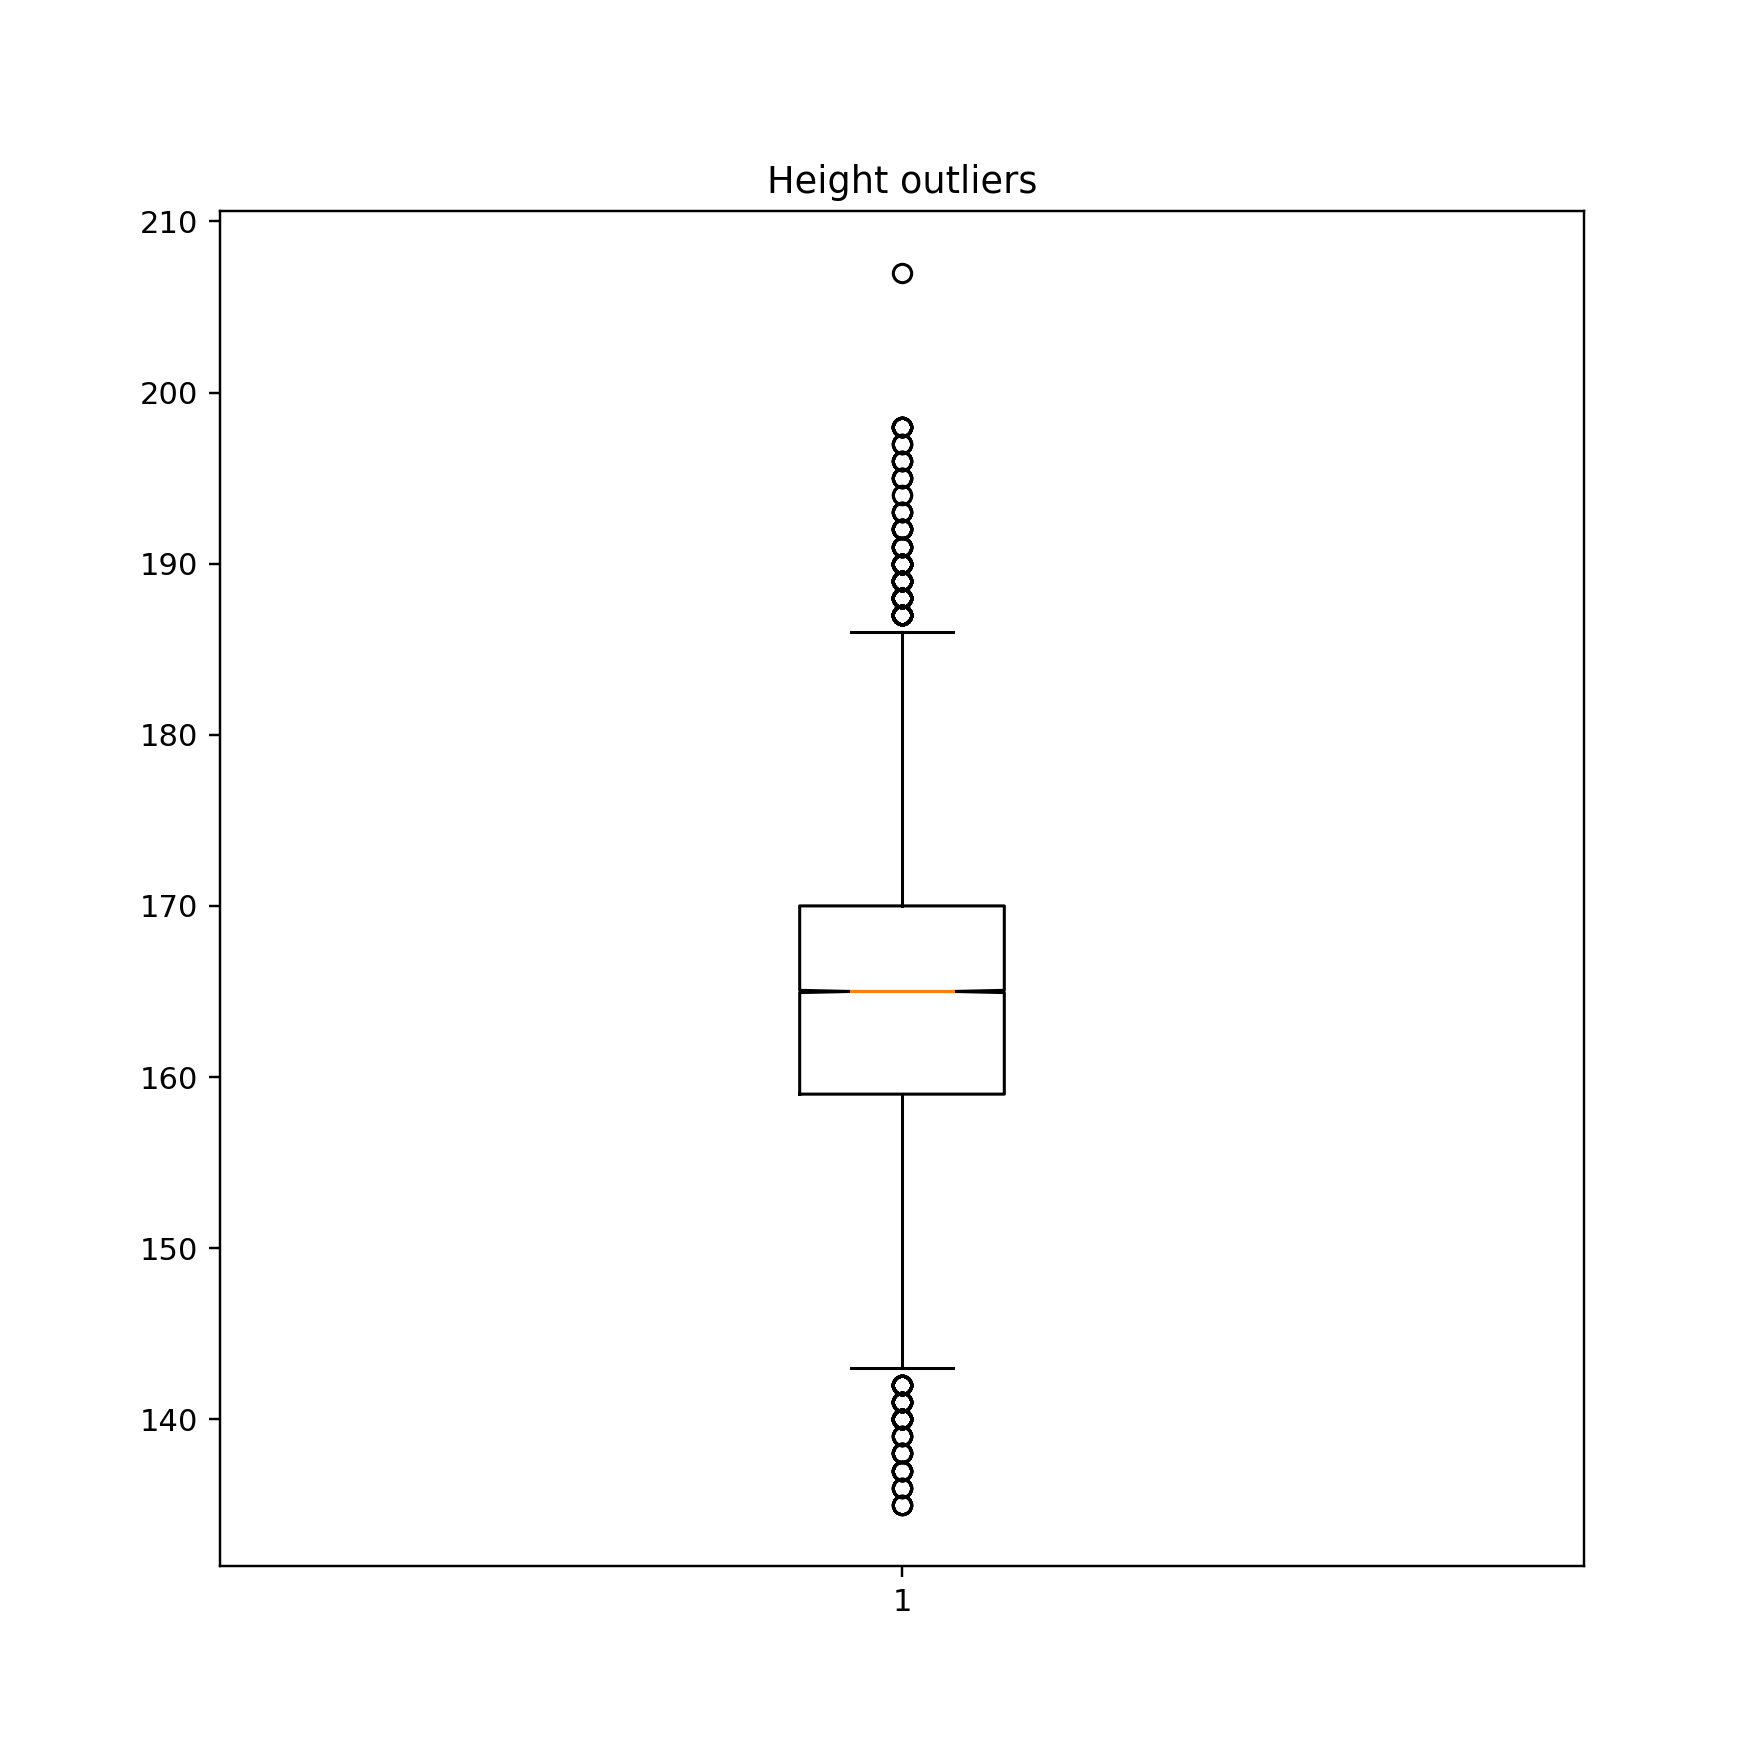

In [15]:
data = [cardio_df["height"]]
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.set_title('Height outliers')
ax1.boxplot(data, notch= True)
plt.show()

In [16]:
cholesterol_cardio_df = cardio_df["cardio"].groupby(cardio_df["cholesterol"]).mean()
cholesterol_cardio_df.head()

cholesterol
1.0    0.434299
2.0    0.594469
3.0    0.761380
Name: cardio, dtype: float64

<IPython.core.display.Javascript object>


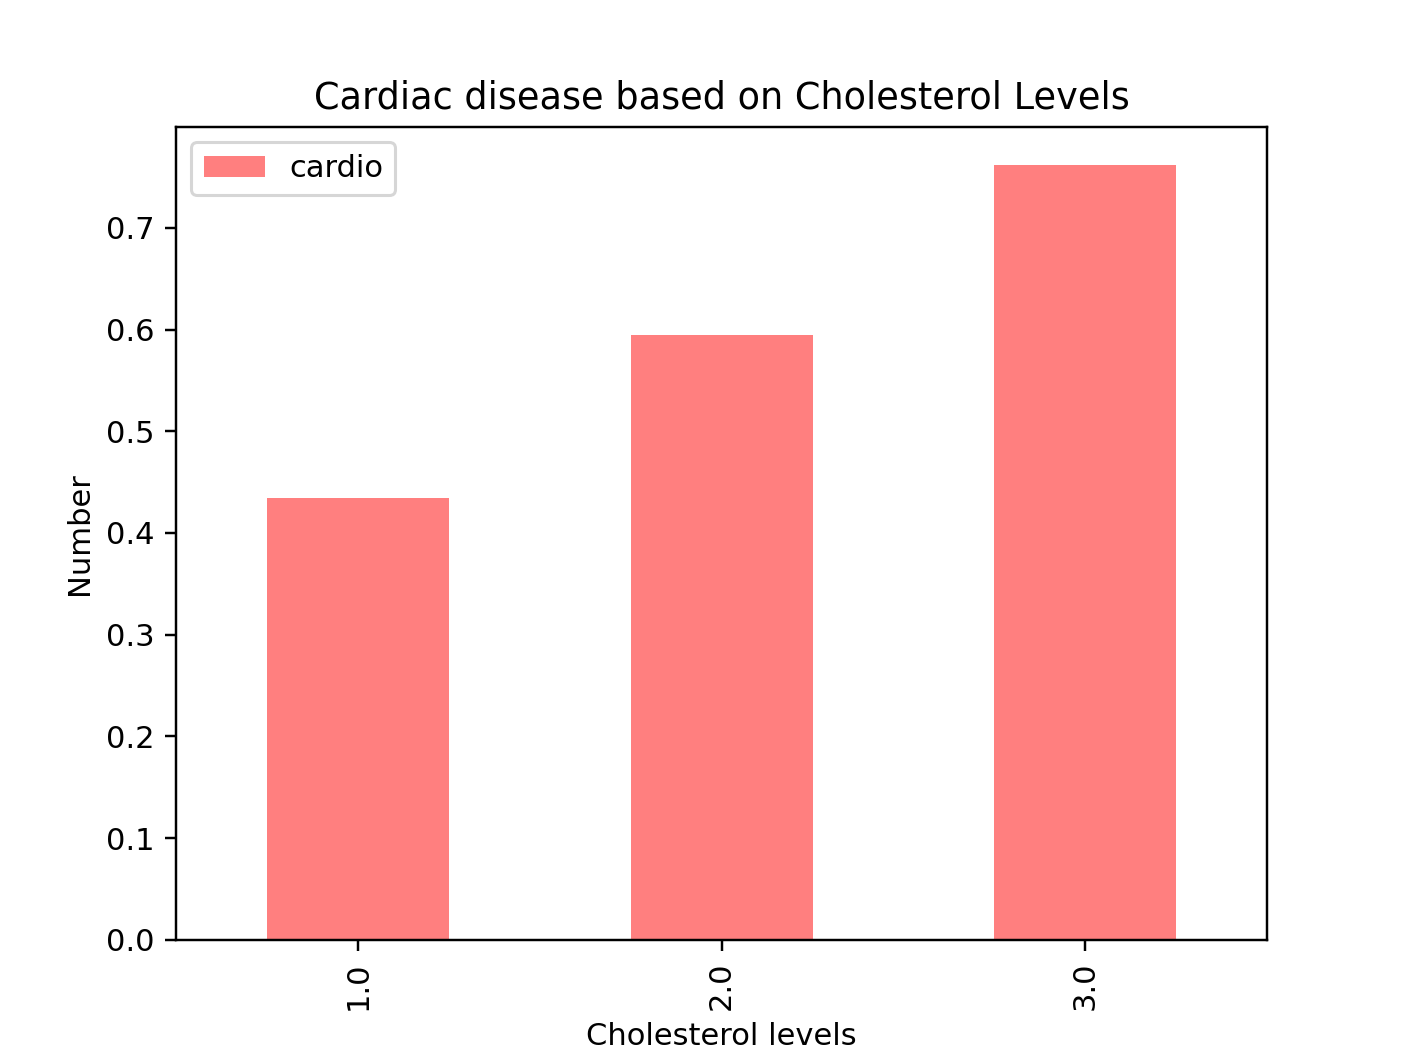

In [17]:
cholesterol_cardio_df.plot.bar(color='r', alpha=0.5, align="center")
# Create labels for the x and y axes.
plt.xlabel("Cholesterol levels")
plt.ylabel("Number")
# Create a title.
plt.title("Cardiac disease based on Cholesterol Levels")
# Add the legend.
plt.legend()

### People with very high Cholesterol level have a greater chance of developing heart disease.

In [18]:
glucose_cardio_df = cardio_df["cardio"].groupby(cardio_df["glucose"]).mean()
glucose_cardio_df.head()

glucose
1.0    0.474391
2.0    0.584830
3.0    0.616438
Name: cardio, dtype: float64

<IPython.core.display.Javascript object>


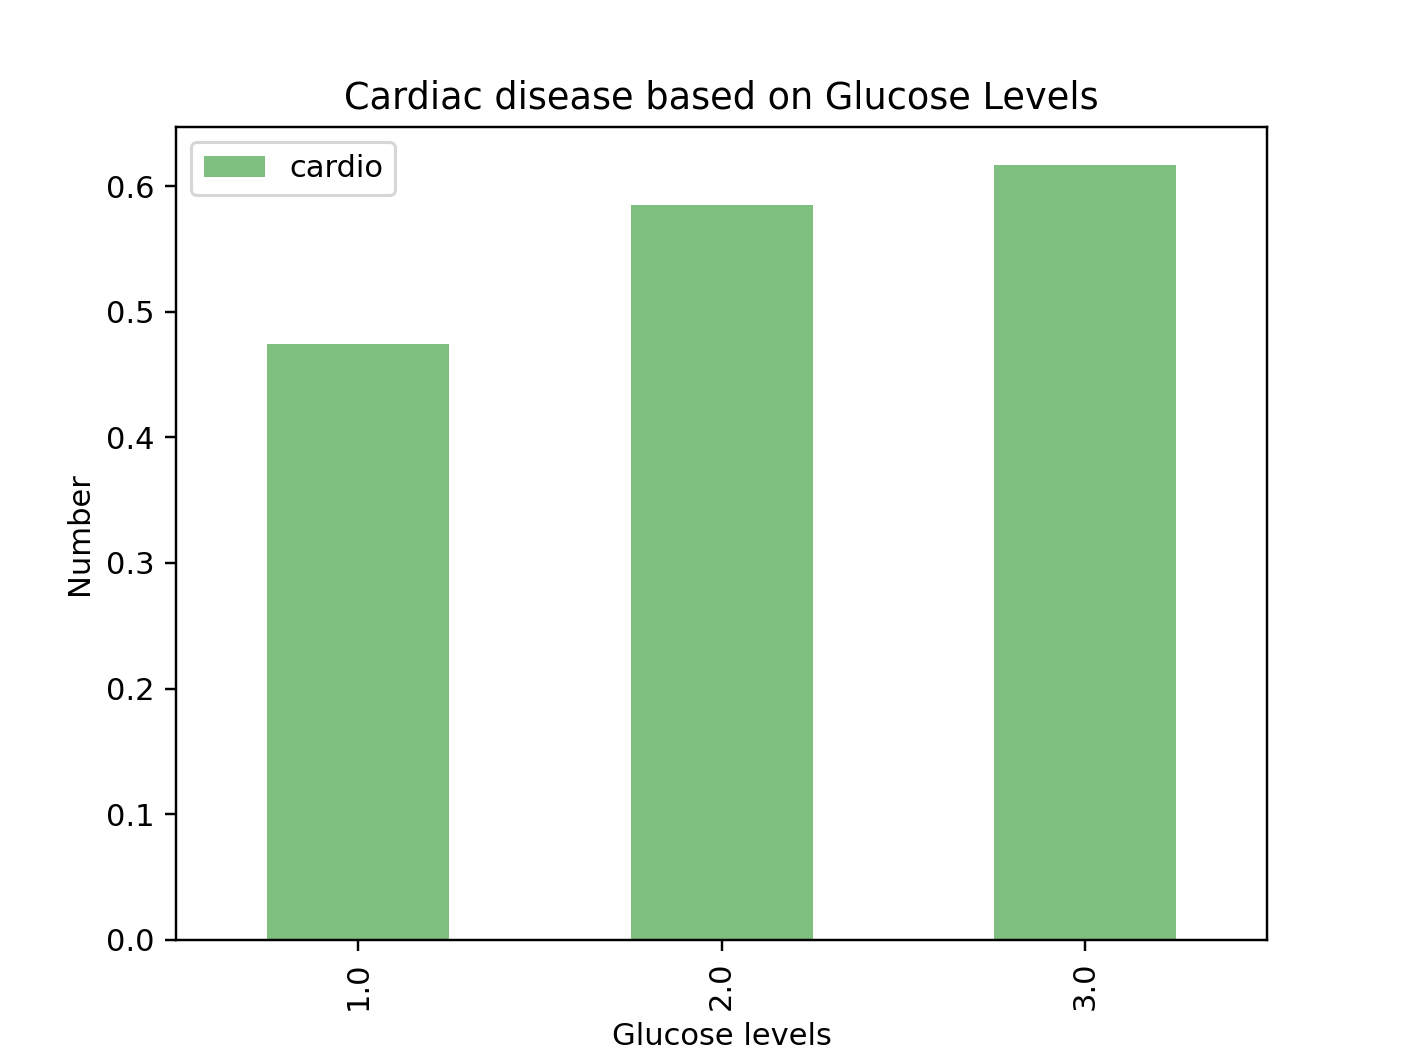

In [19]:
glucose_cardio_df.plot.bar(color='green', alpha=0.5, align="center")
# Create labels for the x and y axes.
plt.xlabel("Glucose levels")
plt.ylabel("Number")
# Create a title.
plt.title("Cardiac disease based on Glucose Levels")
# Add the legend.
plt.legend()

### People with very high Glucose level have a greater chance of developing heart disease.

In [20]:
gender_cardio_df = cardio_df["cardio"].groupby(cardio_df["gender"]).mean()
gender_cardio_df.head()

gender
1.0    0.490967
2.0    0.497583
Name: cardio, dtype: float64

<IPython.core.display.Javascript object>


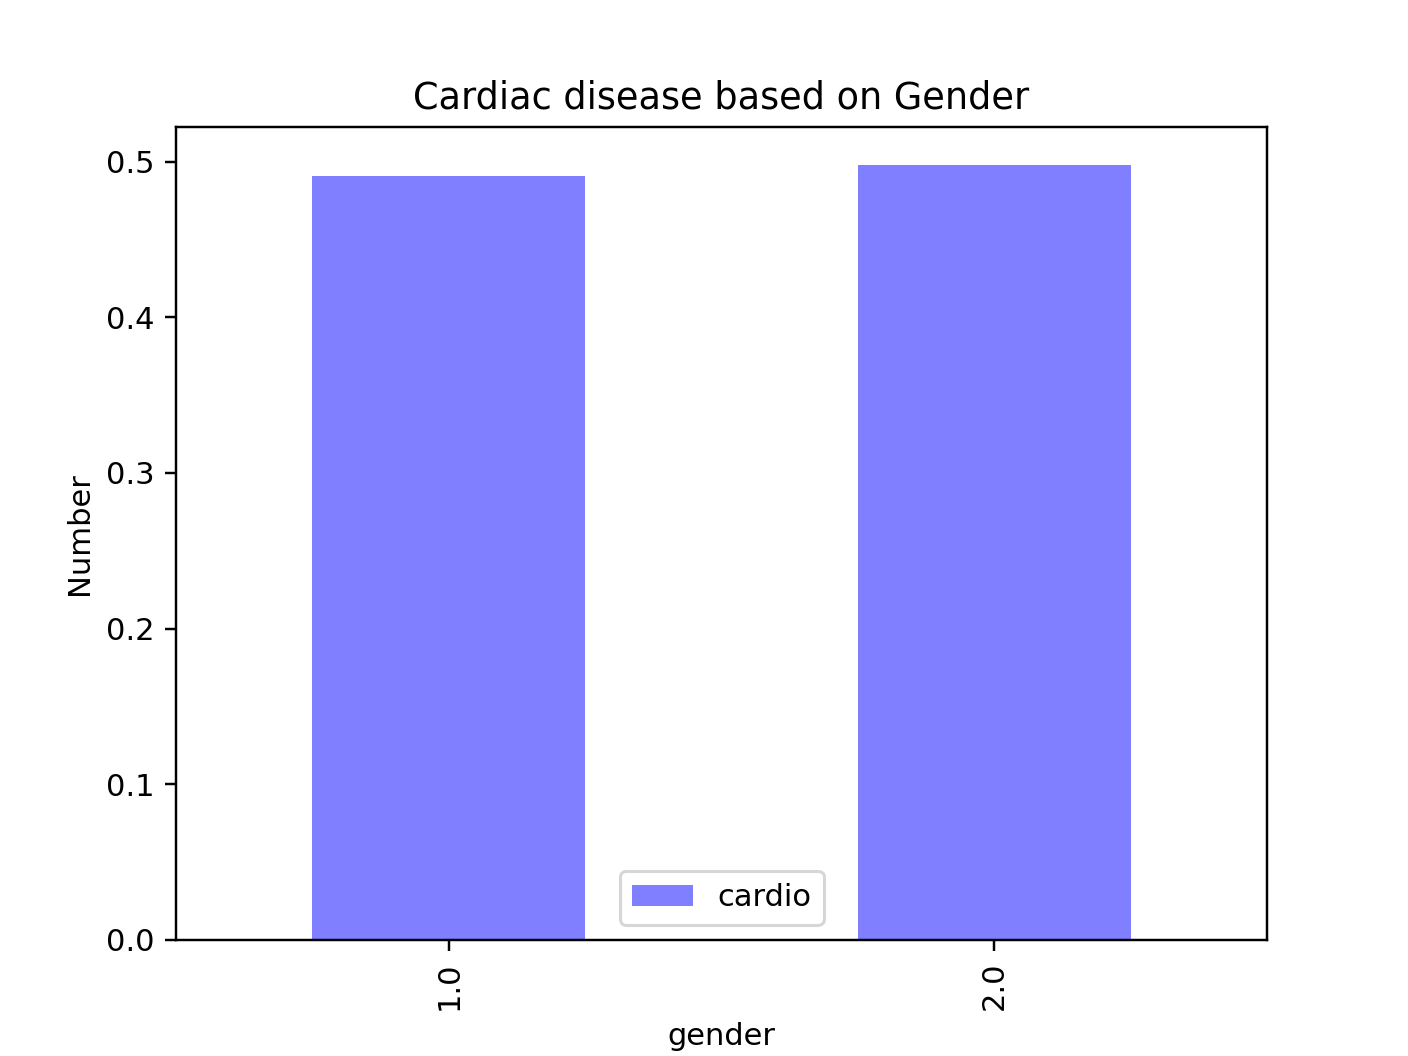

In [21]:
gender_cardio_df.plot.bar(color='blue', alpha=0.5, align="center")
# Create labels for the x and y axes.
plt.xlabel("gender")
plt.ylabel("Number")
# Create a title.
plt.title("Cardiac disease based on Gender")
# Add the legend.
plt.legend()

In [22]:
alcohol_cardio_df = cardio_df["cardio"].groupby(cardio_df["alcohol_intake"]).mean()
alcohol_cardio_df.head()

alcohol_intake
0.0    0.494356
1.0    0.473974
Name: cardio, dtype: float64

<IPython.core.display.Javascript object>


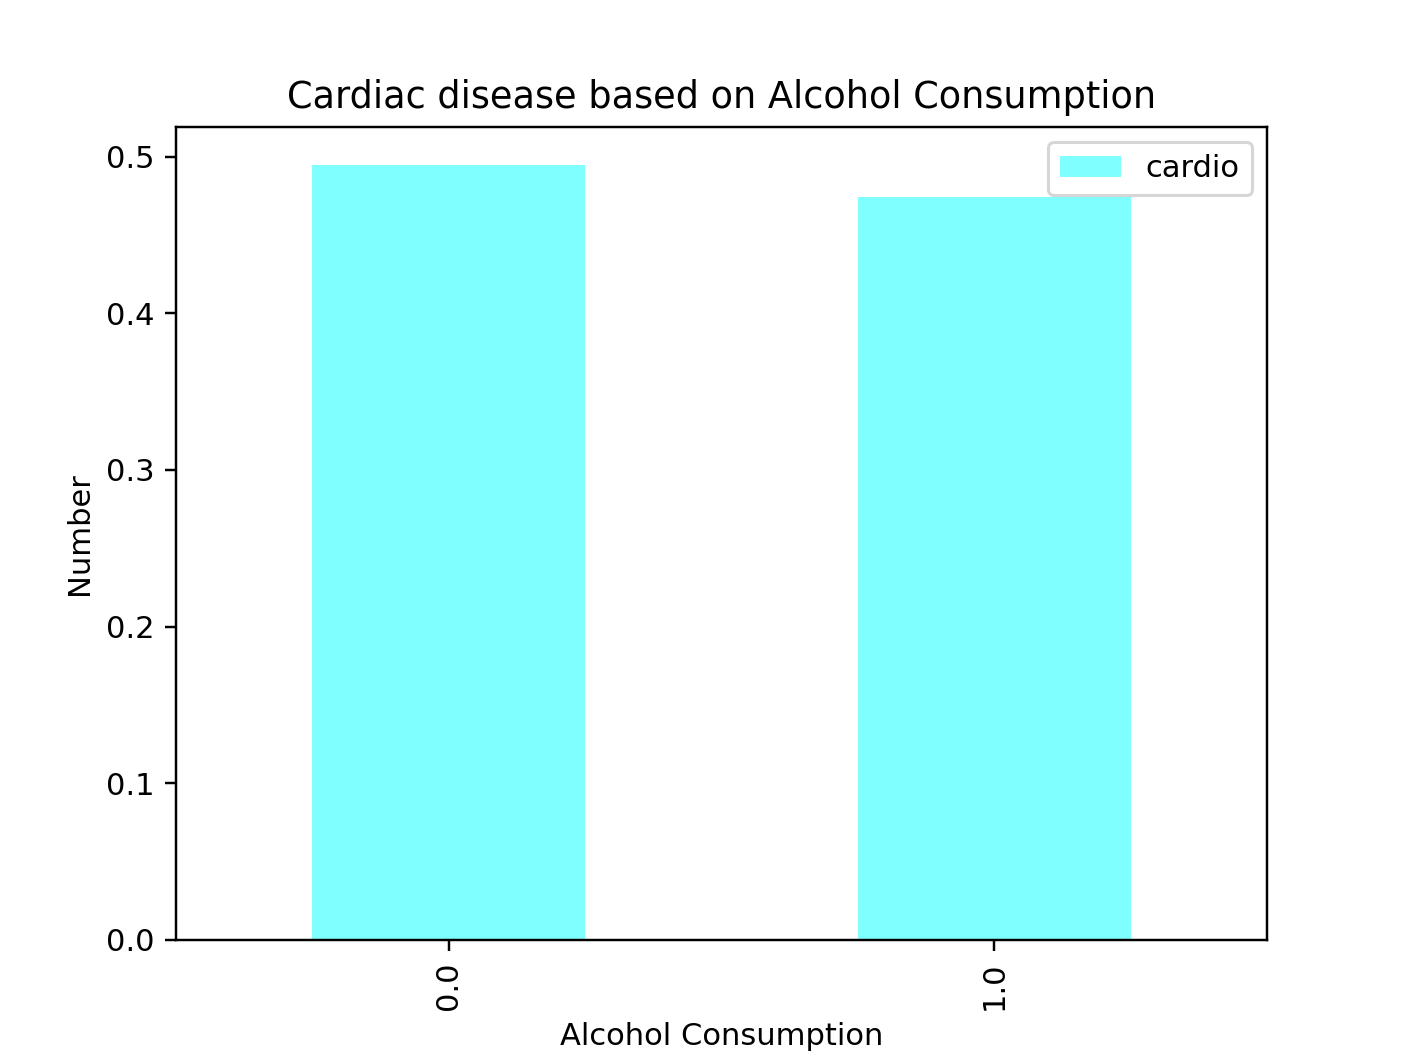

In [23]:
alcohol_cardio_df.plot.bar(color='cyan', alpha=0.5, align="center")
# Create labels for the x and y axes.
plt.xlabel("Alcohol Consumption")
plt.ylabel("Number")
# Create a title.
plt.title("Cardiac disease based on Alcohol Consumption")
# Add the legend.
plt.legend()

### Alcohol consumption alone doesnot Contribute to developing heart disease.

## Relation between Cholesterol levels and heart disease based on gender.

In [88]:
# grouping cholesterol based on gender.
cholesterol_cardio_df = cardio_df.groupby(["cholesterol","gender"]).mean()
cholesterol_cardio_df

id        age      height     weight  \
cholesterol gender                                                   
1.0         1.0     49846.342562  52.386811  161.795745  71.261017   
            2.0     49962.851957  52.181516  169.904207  75.978196   
2.0         1.0     49950.155309  53.327695  160.643789  74.480564   
            2.0     50297.304348  52.892466  170.578493  80.645005   
3.0         1.0     50313.597552  55.823628  160.402077  77.236183   
            2.0     50655.963855  55.467387  170.372663  81.587744   

                    systolic_bp  diastolic_bp   glucose    smoker  \
cholesterol gender                                                  
1.0         1.0      123.799909     79.908099  1.097432  0.015803   
            2.0      125.999075     81.268056  1.102106  0.208839   
2.0         1.0      128.893668     82.167392  1.337522  0.024166   
            2.0      133.166611     84.488882  1.327912  0.273150   
3.0         1.0      133.040245     84.349036  1.949555  0.022626   
            2.0      133.854175     85.129206  1.868716  0.225592   

                    alcohol_intake    active    cardio  
cholesterol gender                                      
1.0         1.0           0.020574  0.802067  0.429418  
            2.0           0.096391  0.803189  0.443041  
2.0         1.0           0.038505  0.793781  0.577896  
            2.0           0.149353  0.806837  0.628609  
3.0         1.0           0.037277  0.811573  0.766506  
            2.0           0.121728  0.829663  0.749896

In [89]:
# Dropping columns not needed
cholesterol_cardio_df.drop(columns=["id","age","height","weight","systolic_bp","diastolic_bp","glucose","smoker","alcohol_intake","active"],inplace=True)
cholesterol_cardio_df.head()

cardio
cholesterol gender          
1.0         1.0     0.429418
            2.0     0.443041
2.0         1.0     0.577896
            2.0     0.628609
3.0         1.0     0.766506

In [49]:
cholesterol_cardio_df.reset_index(inplace=True)
cholesterol_cardio_df

,cholesterol,gender,cardio
0,1.0,1.0,0.429418
1,1.0,2.0,0.443041
2,2.0,1.0,0.577896
3,2.0,2.0,0.628609
4,3.0,1.0,0.766506
5,3.0,2.0,0.749896


In [52]:
cholesterol_cardio_df.dtypes

cholesterol    float64
gender         float64
cardio         float64
dtype: object

In [54]:
df_male = cholesterol_cardio_df[cholesterol_cardio_df["gender"] == 1.0]
df_male

,cholesterol,gender,cardio
0,1.0,1.0,0.429418
2,2.0,1.0,0.577896
4,3.0,1.0,0.766506


In [55]:
df_female = cholesterol_cardio_df[cholesterol_cardio_df["gender"] == 2.0]
df_female

,cholesterol,gender,cardio
1,1.0,2.0,0.443041
3,2.0,2.0,0.628609
5,3.0,2.0,0.749896


<IPython.core.display.Javascript object>


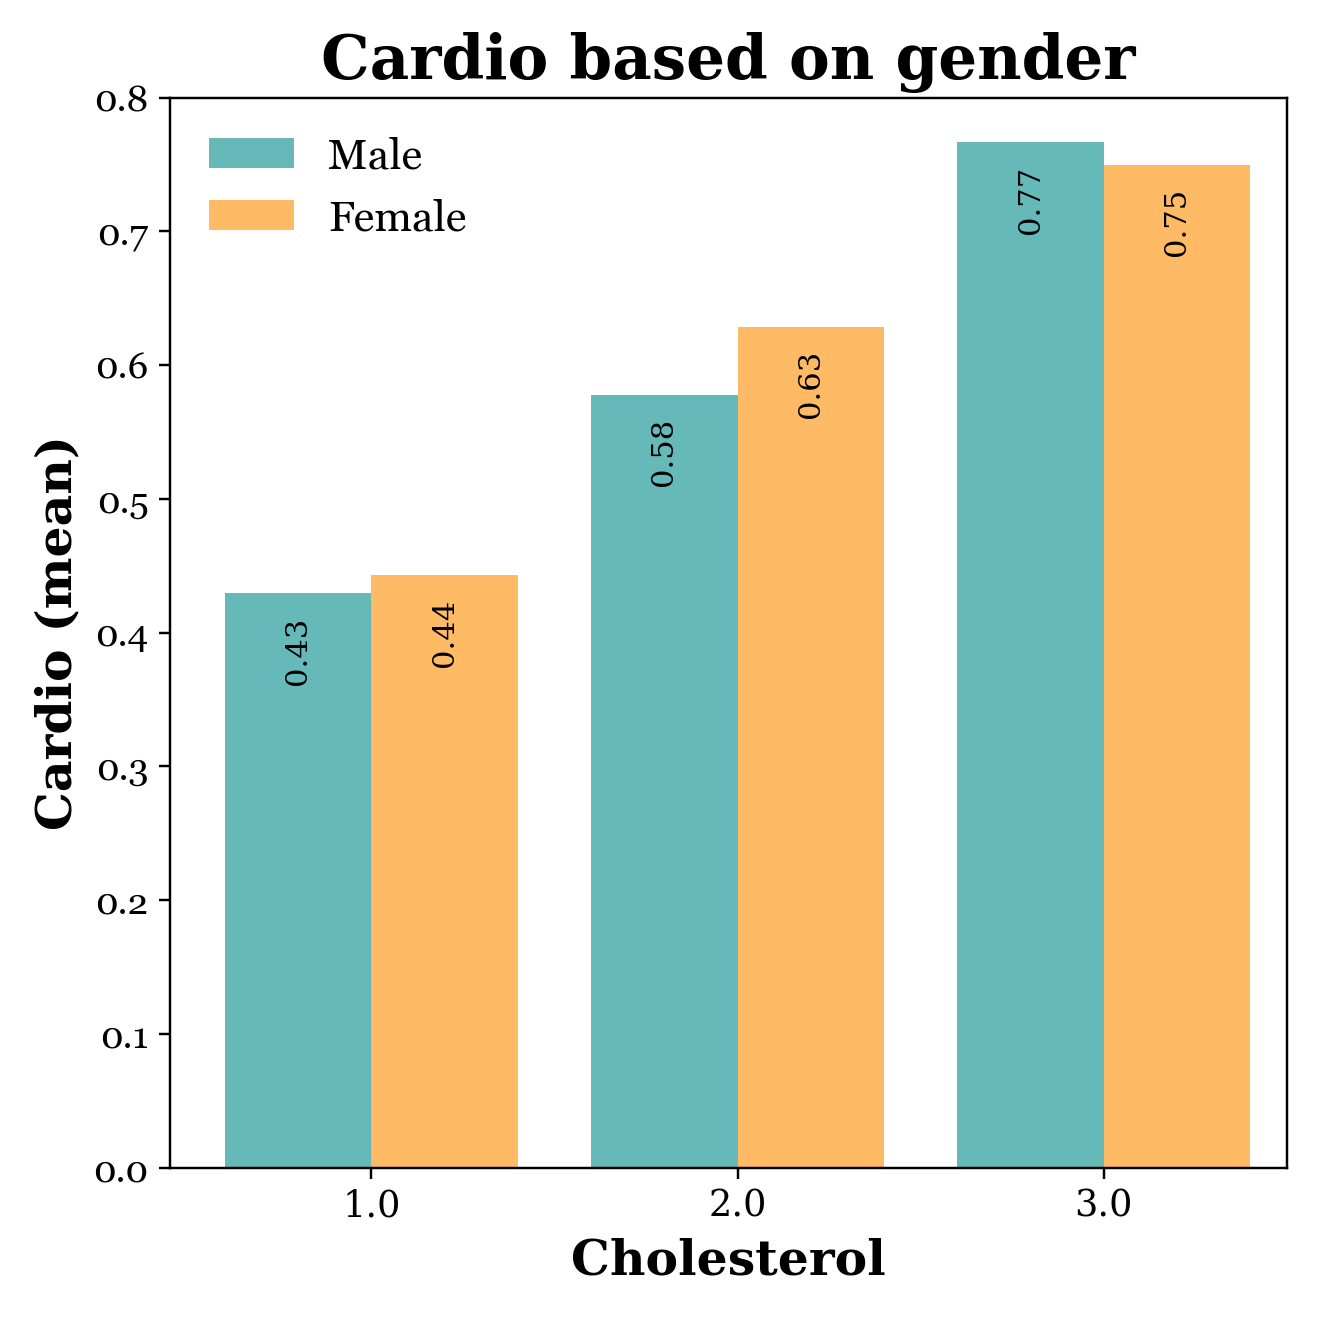

In [86]:
import matplotlib.colors as mcolors
import matplotlib.font_manager
import numpy as np
# Create a font library
plt.rcParams["font.family"]="Georgia","Arial","Times New Roman","serif"
titlefont = {"fontname":"Georgia"}
labelfont = {"fontname":"serif"}
# Define the figure size
fig,ax = plt.subplots(figsize=(6,6))
# Define x-axis for the plot
x = np.arange(len(df_male["cholesterol"]))
# Define the x label
labels = df_male["cholesterol"]
# Format the graph
width = 0.4 # bar width
rects1 = ax.bar(x - width/2, df_male["cardio"], width, color = "darkcyan", alpha = 0.6, label = "Male")
rects2 = ax.bar(x + width/2, df_female["cardio"], width, color = "darkorange", alpha = 0.6, label = "Female")
# Set Chart labels and title
ax.set_title("Cardio based on gender", fontsize=20, fontweight='bold', color="black", alpha=1, **labelfont)
ax.set_xlabel("Cholesterol", fontsize=16, fontweight='bold', color="black", alpha=1, **labelfont)
ax.set_ylabel("Cardio (mean)", fontsize=16, fontweight='bold', color="black", alpha=1, **labelfont)
# Set xticks, labels and legends
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=12,**labelfont)
# Set the x_limits of the plot
ax.set_xlim(-0.55,len(x)-0.5)
# Set the y_limits of the plot
ax.set_ylim(0,0.8)
# Format legend size
ax.legend(prop=dict(size=14),framealpha=1, frameon=False)
ax.tick_params(axis="y", labelsize=12)
# Define a function that annotates the labels on the plot
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                   xy = (rect.get_x() + rect.get_width()/2, height),
                   xytext=(0,-30), # vertical offset
                   textcoords="offset points",rotation=90,
                   ha="center",fontsize=10,color="black",va="bottom",**labelfont)
# Annotate the labels for the bars
autolabel(rects1)
autolabel(rects2)
# Ensure that x_labels show in the plot
fig.tight_layout()
# Display plot
plt.show()

### Women with normal and moderate cholesterol levels are likely to get cardiac disease slightly more than men, whereas men with high cholesterol levels are at a higher risk at developing heart disease. 

## Relation between Glucose levels and heart disease based on gender.

In [96]:
# grouping glucose based on gender.
glucose_cardio_df = cardio_df.groupby(["glucose","gender"]).mean()
glucose_cardio_df.head()

id        age      height     weight  systolic_bp  \
glucose gender                                                                
1.0     1.0     49881.061748  52.680766  161.565295  71.726273   124.885884   
        2.0     50063.240338  52.366737  169.968681  76.358348   127.115845   
2.0     1.0     50246.898883  53.369152  160.615152  76.717567   129.695140   
        2.0     49865.553919  53.470242  170.767826  83.055333   132.027696   
3.0     1.0     49995.480304  55.215532  161.210467  75.935594   129.719190   

                diastolic_bp  cholesterol    smoker  alcohol_intake    active  \
glucose gender                                                                  
1.0     1.0        80.418232     1.257087  0.016951        0.023514  0.804846   
        2.0        81.801290     1.231250  0.217765        0.102800  0.806078   
2.0     1.0        82.622698     1.692726  0.026260        0.041654  0.780561   
        2.0        84.136712     1.599882  0.253388        0.144962  0.801414   
3.0     1.0        82.658694     2.412493  0.018852        0.026449  0.792628   

                  cardio  
glucose gender            
1.0     1.0     0.470415  
        2.0     0.481702  
2.0     1.0     0.574102  
        2.0     0.605775  
3.0     1.0     0.631120

In [97]:
# Dropping columns not needed
glucose_cardio_df.drop(columns=["id","age","height","weight","systolic_bp","diastolic_bp","cholesterol","smoker","alcohol_intake","active"],inplace=True)
glucose_cardio_df.head()

cardio
glucose gender          
1.0     1.0     0.470415
        2.0     0.481702
2.0     1.0     0.574102
        2.0     0.605775
3.0     1.0     0.631120

In [100]:
glucose_cardio_df.reset_index(inplace=True)
glucose_cardio_df

,glucose,gender,cardio
0,1.0,1.0,0.470415
1,1.0,2.0,0.481702
2,2.0,1.0,0.574102
3,2.0,2.0,0.605775
4,3.0,1.0,0.631120
5,3.0,2.0,0.584408


In [101]:
df_male = glucose_cardio_df[glucose_cardio_df["gender"] == 1.0]
df_male

,glucose,gender,cardio
0,1.0,1.0,0.470415
2,2.0,1.0,0.574102
4,3.0,1.0,0.631120


In [102]:
df_female = glucose_cardio_df[glucose_cardio_df["gender"] == 1.0]
df_female

,glucose,gender,cardio
0,1.0,1.0,0.470415
2,2.0,1.0,0.574102
4,3.0,1.0,0.631120


<IPython.core.display.Javascript object>


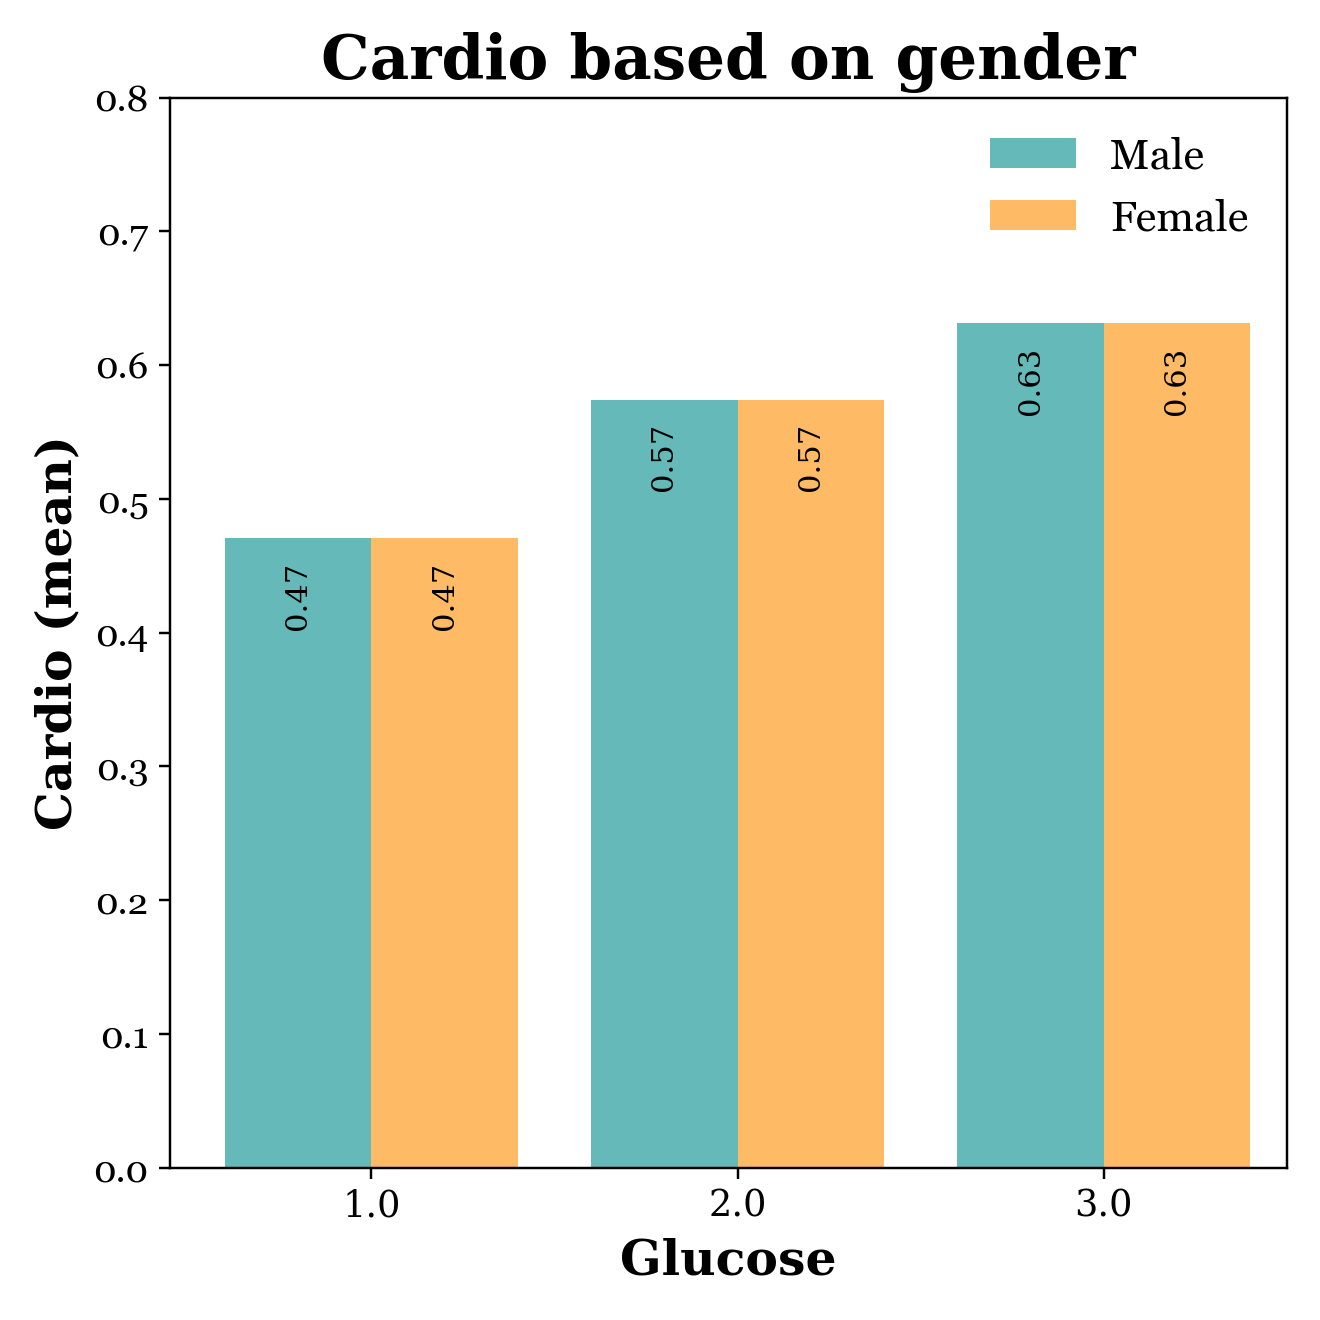

In [105]:
# Create a font library
plt.rcParams["font.family"]="Georgia","Arial","Times New Roman","serif"
titlefont = {"fontname":"Georgia"}
labelfont = {"fontname":"serif"}
# Define the figure size
fig,ax = plt.subplots(figsize=(6,6))
# Define x-axis for the plot
x = np.arange(len(df_male["glucose"]))
# Define the x label
labels = df_male["glucose"]
# Format the graph
width = 0.4 # bar width
rects1 = ax.bar(x - width/2, df_male["cardio"], width, color = "darkcyan", alpha = 0.6, label = "Male")
rects2 = ax.bar(x + width/2, df_female["cardio"], width, color = "darkorange", alpha = 0.6, label = "Female")
# Set Chart labels and title
ax.set_title("Cardio based on gender", fontsize=20, fontweight='bold', color="black", alpha=1, **labelfont)
ax.set_xlabel("Glucose", fontsize=16, fontweight='bold', color="black", alpha=1, **labelfont)
ax.set_ylabel("Cardio (mean)", fontsize=16, fontweight='bold', color="black", alpha=1, **labelfont)
# Set xticks, labels and legends
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=12,**labelfont)
# Set the x_limits of the plot
ax.set_xlim(-0.55,len(x)-0.5)
# Set the y_limits of the plot
ax.set_ylim(0,0.8)
# Format legend size
ax.legend(prop=dict(size=14),framealpha=1, frameon=False)
ax.tick_params(axis="y", labelsize=12)
# Define a function that annotates the labels on the plot
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                   xy = (rect.get_x() + rect.get_width()/2, height),
                   xytext=(0,-30), # vertical offset
                   textcoords="offset points",rotation=90,
                   ha="center",fontsize=10,color="black",va="bottom",**labelfont)
# Annotate the labels for the bars
autolabel(rects1)
autolabel(rects2)
# Ensure that x_labels show in the plot
fig.tight_layout()
# Display plot
plt.show()

### Both Male and Female are at equal risk at developing heart disease with normal, moderate and high level of blood sugar.

## People with high glucose and high cholesterol.

In [106]:
# grouping cholesterol and glucose.
together_cardio_df = cardio_df.groupby(["cholesterol","glucose"]).mean()
together_cardio_df

id        age    gender      height     weight  \
cholesterol glucose                                                             
1.0         1.0      49895.890190  52.240734  1.357302  164.720165  72.623103   
            2.0      50156.896425  52.778643  1.376719  164.118240  77.890009   
            3.0      49227.206207  53.995862  1.363448  164.948966  76.299862   
2.0         1.0      50011.404180  53.037037  1.330874  163.742124  75.374775   
            2.0      49978.812633  53.348271  1.312420  164.211268  78.799232   
            3.0      51518.451351  54.764865  1.345946  164.464865  81.605405   
3.0         1.0      50431.300936  55.773728  1.326500  163.466211  78.897494   
            2.0      50612.608247  56.480412  1.294845  163.006186  83.562062   
            3.0      50377.234017  55.532560  1.289622  163.562890  77.486649   

                     systolic_bp  diastolic_bp    smoker  alcohol_intake  \
cholesterol glucose                                                        
1.0         1.0       124.375373     80.306511  0.083869        0.046279   
            2.0       128.280477     82.144363  0.107699        0.076077   
            3.0       126.013793     80.683448  0.086897        0.053103   
2.0         1.0       129.842016     82.765483  0.108345        0.075457   
            2.0       131.105420     83.255228  0.098592        0.074264   
            3.0       133.005405     83.664865  0.100000        0.064865   
3.0         1.0       134.431536     85.064288  0.099722        0.074158   
            2.0       137.408247     87.016495  0.105155        0.090722   
            3.0       131.358311     83.682426  0.065418        0.046685   

                       active    cardio  
cholesterol glucose                      
1.0         1.0      0.802775  0.429081  
            2.0      0.788268  0.532081  
            3.0      0.813793  0.458621  
2.0         1.0      0.802059  0.596588  
            2.0      0.782330  0.588135  
            3.0      0.827027  0.597297  
3.0         1.0      0.840800  0.819539  
            2.0      0.810309  0.806186  
            3.0      0.790366  0.686589

In [107]:
# Dropping columns not needed
together_cardio_df.drop(columns=["id","age","gender","height","weight","systolic_bp","diastolic_bp","smoker","alcohol_intake","active"],inplace=True)
together_cardio_df.head()

cardio
cholesterol glucose          
1.0         1.0      0.429081
            2.0      0.532081
            3.0      0.458621
2.0         1.0      0.596588
            2.0      0.588135

In [108]:
together_cardio_df.reset_index(inplace=True)
together_cardio_df

,cholesterol,glucose,cardio
0,1.0,1.0,0.429081
1,1.0,2.0,0.532081
2,1.0,3.0,0.458621
3,2.0,1.0,0.596588
4,2.0,2.0,0.588135
5,2.0,3.0,0.597297
6,3.0,1.0,0.819539
7,3.0,2.0,0.806186
8,3.0,3.0,0.686589
